# Inhertance in class

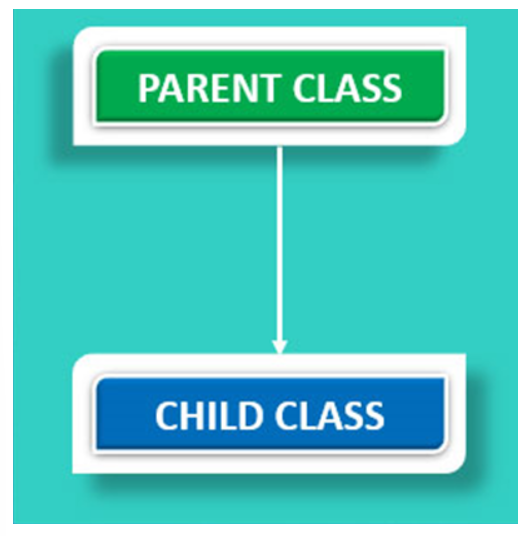

In [1]:
from warnings import filterwarnings
filterwarnings("ignore")

# Single Inhertance
Parent -> Child

In [2]:
class Person:

    def __init__(self, name: str, age: int):
        self.name = name
        self.age = age

    def intro(self):
        print(f"My name is {self.name}")
        print(f"I am {self.age} years old")

In [3]:
class Employee(Person):

    def __init__(self, name: str, age: int, company: str):
        super().__init__(name, age)
        self.company = company

    def work(self):
        print(f"I work at {self.company}")

In [4]:
p1 = Person(name = "Rahul", age=28)
type(p1)

__main__.Person

In [5]:
p1.name

'Rahul'

In [6]:
p1.age

28

In [7]:
p1.intro()

My name is Rahul
I am 28 years old


In [9]:
e1 = Employee(name= "Rahul", age=28, company="TCS")

In [10]:
type(e1)

__main__.Employee

In [11]:
e1.name

'Rahul'

In [12]:
e1.age

28

In [13]:
e1.company

'TCS'

In [14]:
e1.work()

I work at TCS


In [15]:
e1.intro()

My name is Rahul
I am 28 years old


In [16]:
# Intro function got inherited from employee class
e1.intro()
e1.work()

My name is Rahul
I am 28 years old
I work at TCS


# Inheritance using pydantic

In [1]:
! uv add pydantic

Resolved 133 packages in 1ms
Audited 129 packages in 41ms


1. gt - greater than
2. ge - greater than or equal to
3. lt - less than
4. le - less than or equal to

In [2]:
from pydantic import BaseModel, Field
from typing import Literal

class Student(BaseModel):
    name: str = Field(max_length=20)
    age: int = Field(ge=18, le=60)
    marks: float = Field(ge=0, le=100)
    gender: Literal["male", "female"]
    hobbies: list[str] = Field(default_factory=list)

    def get_info(self):
        print(f"Name :{self.name}")
        print(f"Age : {self.age}")
        print(f"Marks : {self.marks}")
        print(f"Gender : {self.gender}")
        print(f"Hobbies : {self.hobbies}")

In [3]:
s1 = Student(name="Sarthak", age=21, marks=78.5, gender="male", hobbies=["singing", "dancing"])
type(s1)

__main__.Student

In [4]:
print(s1)

name='Sarthak' age=21 marks=78.5 gender='male' hobbies=['singing', 'dancing']


In [5]:
s1.name

'Sarthak'

In [6]:
s1.age

21

In [7]:
s1.gender

'male'

In [8]:
s1.hobbies

['singing', 'dancing']

In [9]:
s1.get_info()

Name :Sarthak
Age : 21
Marks : 78.5
Gender : male
Hobbies : ['singing', 'dancing']


In [10]:
s2 = Student(name=12, age=12, marks=78, gender="male")

ValidationError: 2 validation errors for Student
name
  Input should be a valid string [type=string_type, input_value=12, input_type=int]
    For further information visit https://errors.pydantic.dev/2.12/v/string_type
age
  Input should be greater than or equal to 18 [type=greater_than_equal, input_value=12, input_type=int]
    For further information visit https://errors.pydantic.dev/2.12/v/greater_than_equal

In [11]:
s3 = Student(
    name = True,
    age = 85,
    gender = "HR",
    hobbies= ("dancing",)
)

ValidationError: 4 validation errors for Student
name
  Input should be a valid string [type=string_type, input_value=True, input_type=bool]
    For further information visit https://errors.pydantic.dev/2.12/v/string_type
age
  Input should be less than or equal to 60 [type=less_than_equal, input_value=85, input_type=int]
    For further information visit https://errors.pydantic.dev/2.12/v/less_than_equal
marks
  Field required [type=missing, input_value={'name': True, 'age': 85,...'hobbies': ('dancing',)}, input_type=dict]
    For further information visit https://errors.pydantic.dev/2.12/v/missing
gender
  Input should be 'male' or 'female' [type=literal_error, input_value='HR', input_type=str]
    For further information visit https://errors.pydantic.dev/2.12/v/literal_error

# Multiple Inhertance
BaseSalary, Bonus, Tax -> Totalsalary

In [12]:
class BaseSalary:

    def __init__(self, base_sal: float):
        self.base_sal = base_sal

    def get_base_salary(self) -> float:
        return self.base_sal

In [13]:
class Bonus:

    def __init__(self, per_bonus: float):
        self.per_bonus = per_bonus

    def calculate_bonus(self, base_sal: float) -> float:
        return (self.per_bonus / 100) * base_sal

In [14]:
class Tax:

    def __init__(self, per_tax: float):
        self.per_tax = per_tax

    def calcuate_tax(self, gross_sal: float) -> float:
        return (self.per_tax / 100) * gross_sal 

In [15]:
class TotalSalary(BaseSalary, Bonus, Tax):

    def __init__(self, base_sal:float, per_bonus: float, per_tax: float):
        BaseSalary.__init__(self, base_sal)
        Bonus.__init__(self, per_bonus)
        Tax.__init__(self, per_tax)

    def get_net_salary(self):
        print(f"Base salary : {self.base_sal:.2f} INR")
        bonus = Bonus.calculate_bonus(self, self.base_sal)
        print(f"Bonus Amount : {bonus:.2f} INR")
        gross_sal = self.base_sal + bonus
        print(f"Gross Salary : {gross_sal:.2f} INR")
        tax = Tax.calcuate_tax(self, gross_sal)
        print(f"Tax : {tax:.2f} INR")
        net_sal = gross_sal - tax
        print(f"Net Salary : {net_sal:.2f} INR")
        return net_sal

In [16]:
s = TotalSalary(base_sal=50_000, per_bonus=25, per_tax=10)

In [17]:
s.base_sal

50000

In [18]:
s.per_bonus

25

In [19]:
s.per_bonus

25

In [20]:
s.per_tax

10

In [21]:
net_sal1 = s.get_net_salary()

Base salary : 50000.00 INR
Bonus Amount : 12500.00 INR
Gross Salary : 62500.00 INR
Tax : 6250.00 INR
Net Salary : 56250.00 INR


In [22]:
s.get_base_salary()

50000

# Inheritance Type

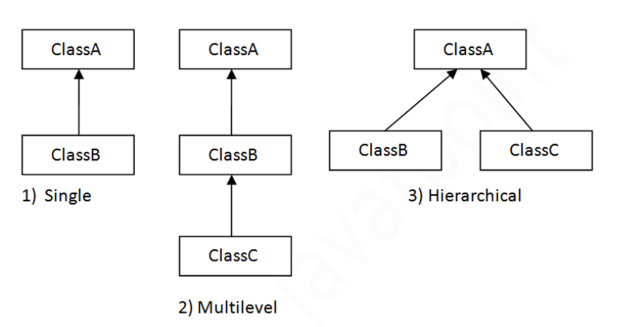

In [23]:
class Employee:

    def __init__(self, emp_id, name):
        self.name = name
        self.emp_id = emp_id

    def get_employee_info(self):
        print(f"Employee Id : {self.emp_id}, Name : {self.name}")


In [24]:
class Manager(Employee):

    def __init__(self, emp_id, name, dept):
        super().__init__(emp_id, name)
        self.dept = dept
    
    def get_manager_dept(self):
        print(f"Departement : {self.dept}")

In [25]:
class ProjectManager(Manager):

    def __init__(self, emp_id, name, dept, project_name):
        super().__init__(emp_id, name, dept)
        self.project_name = project_name

    def get_project_info(self):
        print(f"Project : {self.project_name}")

In [26]:
e1 = Employee(emp_id=101, name="Rahul")

In [27]:
e1.emp_id

101

In [28]:
e1.name

'Rahul'

In [29]:
e1.get_employee_info()

Employee Id : 101, Name : Rahul


In [30]:
m1 = Manager(emp_id=102, name="Sarthak", dept="Mechanical Engg.")

In [31]:
m1.get_employee_info()

Employee Id : 102, Name : Sarthak


In [32]:
m1.get_manager_dept()

Departement : Mechanical Engg.


In [33]:
m1.get_manager_dept()
m1.get_employee_info()

Departement : Mechanical Engg.
Employee Id : 102, Name : Sarthak


In [34]:
pm1 = ProjectManager(emp_id=103, name="Aditi", dept="Engg.", project_name="JLR")

In [35]:
pm1.emp_id

103

In [36]:
pm1.name

'Aditi'

In [37]:
pm1.dept

'Engg.'

In [38]:
pm1.project_name

'JLR'

In [39]:
pm1.get_employee_info()

Employee Id : 103, Name : Aditi


In [40]:
pm1.get_manager_dept()

Departement : Engg.


In [41]:
pm1.get_project_info()

Project : JLR


In [43]:
pm1.get_project_info()
pm1.get_employee_info()
pm1.get_manager_dept()

Project : JLR
Employee Id : 103, Name : Aditi
Departement : Engg.


# Hierachical inheritance

In [44]:
# Base class in general any shape
class Shape:

    def perimeter(self):
        pass

    def area(self):
        pass

    def print_area_perimeter(self):
        print(f"Perimeter : {self.perimeter():.2f}, Area : {self.area():.2f}")

In [45]:
class Rectangle(Shape):

    def __init__(self, width, height):
        self.width = width
        self.height = height
    
    def perimeter(self):
        return 2 * (self.width + self.height)
    
    def area(self):
        return self.width * self.height

In [46]:
import math

class Circle(Shape):

    def __init__(self, radius):
        self.radius = radius

    def perimeter(self):
        return 2 * math.pi * self.radius
    
    def area(self):
        return math.pi * (self.radius ** 2)


In [47]:
s = [
    Rectangle(width=30, height=15),
    Circle(radius=20),
    Circle(radius=24),
    Rectangle(width=50, height=25),
    Circle(radius=35)
]

In [48]:
for i in s:
    print(type(i))
    i.print_area_perimeter()
    print("="*40)

<class '__main__.Rectangle'>
Perimeter : 90.00, Area : 450.00
<class '__main__.Circle'>
Perimeter : 125.66, Area : 1256.64
<class '__main__.Circle'>
Perimeter : 150.80, Area : 1809.56
<class '__main__.Rectangle'>
Perimeter : 150.00, Area : 1250.00
<class '__main__.Circle'>
Perimeter : 219.91, Area : 3848.45
